# A Comparison of England and Craven's Monthly Crime per head

I have moved to Craven recently and want to see if it is a suitable place to rent. One measure I want to use is to see if the crime rate in Craven is significantly lower than other places in England.

## Gathering the Data
I took data for both Craven and England from https://data.police.uk/ and then concatenated the multiple CSV files into a single dataframe using glob.


In [13]:
%config IPCompleter.greedy=True
import plotly.figure_factory as ff
from matplotlib import pyplot

In [14]:
#import the UK wide crim data. Dont forget to remove the craven stuff

import glob
import pandas as pd
import numpy as np

# glob.glob('data*.csv') - returns List[str]
# pd.read_csv(f) - returns pd.DataFrame()
# for f in glob.glob() - returns a List[DataFrames]
# pd.concat() - returns one pd.DataFrame()
ukdf = pd.concat([pd.read_csv(f) for f in glob.glob('D:/Ukwidecrimedata/*.csv')], ignore_index = True)
ukdf.columns = [c.replace(' ', '_') for c in ukdf.columns]

T test is compare two means

Got the UK data by concat smaller CSVs
Checked its distribution when grouped by crime ID. Its not normal.
Checked and its log-normal so will need to log it later.
Created the craven table from the main one and removed craven from the UK table.
Created the england table by removing wales from the UK table.
Extracted the data for each month from the england and craven tables
Grouped this data by the crime type for each month
Divided the data by the respective population to get the crime per head population. Logged this data so it became normal.
Took a mean across the months to get the monthly crime per head population
Used this to do the t-test for each crime type by comparing the means
Found out all of them were statistically 



compile big UK dataframe.
remove wales
reformat column names
remove craven and create craven frame
split into smaller monthly dataframes and group by crime totals
do the same for the craven one
get a mean across several months for both the craven one and the england one
compare means

England total - composed of All UK crime counts divided by whole UK population
-REMOVE THE WALES DATA FIRST
Skipton mean - composed of all Skipton crime counts divided by Skipton population

Get a mean across all months for each crime in both skipton and uk
Compare the mean
Do t test
....?
WIN

Get the Independant UK data, then sum (count) all of the occurances of crimes for each type of crime .groupby('Crime type').count()
Do the same craven

then divide by population

then compare the figures


If do it by LSOA, then first group and count by LSOA and CRIme type, then extract the craven or whatever data as it will save steps

## Check the distribution
I checked the distribution of the data using a histogram and it is clearly not a normal distribution. However, logging the data shows that it is log-normal and so we can still do parametric statistical test on it later.

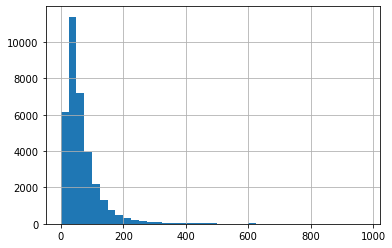

In [15]:
#checked the distribution of the data
#its a poisson distribution and not normal
ukdf.groupby(['LSOA_code']).Crime_ID.count().hist(bins=range(0,1000,25))

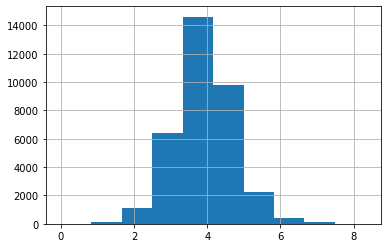

In [16]:
#I did a log of the data above and it is normal. Now to use this data rather than the one below.
uklogprep = ukdf.groupby(['LSOA_code']).Crime_ID.count()
uklog = np.log(uklogprep)
uklog.hist()

In [17]:
#create the craven table from the UK one. Then get a list of all of the craven codes so we can cut them from the main table
craventest = ukdf[ukdf['LSOA_name'].str.contains("Craven", na=False)]
cravencorrect = craventest[['Crime_type','Month']]

## Remove Wales data to make it England only
I decided that I wanted to narrow it down and compare only to rest of England. Therefore I removed the crime data for Wales from the dataset.

In [23]:
#find all the values for wales
wales = ukdf[ukdf['LSOA_code'].str.contains("W", na=False)]
wales['LSOA_code'].unique()

array(['W01001561', 'W01001644', 'W01000773', ..., 'W01000464',
       'W01000450', 'W01001809'], dtype=object)

In [24]:
#Dropping the wales data to make it England only. Dropping the Craven from the England dataframe so that they are both independant.
nocravenuk = ukdf.drop(index=craventest.index) #this works by dropping all of the rows where the index is equal the non-reset indexes of the craven table drawn from the main dataset
engonly = nocravenuk.drop(index=wales.index) #remove the wales data

In [25]:
eng_ind = engonly[['Crime_type', 'Month']]

## Creating the monthly datasets

I created dataframes for each of the 6 months in the England and Craven datasets. 

In [26]:
#April
ukapril = eng_ind.loc[eng_ind['Month'] == '2019-04']
ukapril.rename(columns={'Month':'April'}, inplace=True)
cravenapril = cravencorrect.loc[cravencorrect['Month'] == '2019-04']
cravenapril.rename(columns={'Month':'April'}, inplace=True)
#May
ukmay = eng_ind.loc[eng_ind['Month'] == '2019-05']
ukmay.rename(columns={'Month':'May'}, inplace=True)
cravenmay = cravencorrect.loc[cravencorrect['Month'] == '2019-05']
cravenmay.rename(columns={'Month':'May'}, inplace=True)
#June
ukjune = eng_ind.loc[eng_ind['Month'] == '2019-06']
ukjune.rename(columns={'Month':'June'}, inplace=True)
cravenjune = cravencorrect.loc[cravencorrect['Month'] == '2019-06']
cravenjune.rename(columns={'Month':'June'}, inplace=True)
#July
ukjuly = eng_ind.loc[eng_ind['Month'] == '2019-07']
ukjuly.rename(columns={'Month':'July'}, inplace=True)
cravenjuly = cravencorrect.loc[cravencorrect['Month'] == '2019-07']
cravenjuly.rename(columns={'Month':'July'}, inplace=True)
#August
ukaugust = eng_ind.loc[eng_ind['Month'] == '2019-08']
ukaugust.rename(columns={'Month':'August'}, inplace=True)
cravenaugust = cravencorrect.loc[cravencorrect['Month'] == '2019-08']
cravenaugust.rename(columns={'Month':'August'}, inplace=True)
#September
uksep = eng_ind.loc[eng_ind['Month'] == '2019-09']
uksep.rename(columns={'Month':'September'}, inplace=True)
cravensep = cravencorrect.loc[cravencorrect['Month'] == '2019-09']
cravensep.rename(columns={'Month':'September'}, inplace=True)

## Grouping the data by crime type
I grouped the data by crime type for each of the month dataframes for both England and Craven and counted how many of each crime were comitted.

In [27]:
#april
ukapril_group = ukapril.groupby('Crime_type').count()
cravenapril_group = cravenapril.groupby('Crime_type').count()
#may
ukmay_group = ukmay.groupby('Crime_type').count()
cravenmay_group = cravenmay.groupby('Crime_type').count()
#june
ukjune_group = ukjune.groupby('Crime_type').count()
cravenjune_group = cravenjune.groupby('Crime_type').count()
#july
ukjuly_group = ukjuly.groupby('Crime_type').count()
cravenjuly_group = cravenjuly.groupby('Crime_type').count()
#august
ukaugust_group = ukaugust.groupby('Crime_type').count()
cravenaugust_group = cravenaugust.groupby('Crime_type').count()
#september
uksep_group = uksep.groupby('Crime_type').count()
cravensep_group = cravensep.groupby('Crime_type').count()

## Create the crime per population data for each month
I dervived the crime per population by dividing the counts of the crime types by the population of England and Craven respectively. I logged the data at this stage so as to make it normally distributed.

In [28]:
#divide by the populations
engpop = 66435600
cravenpop = 53600
#april
engpopapril = np.log(ukapril_group.div(engpop-cravenpop))
cravenpopapril = np.log(cravenapril_group.div(cravenpop))
#may
engpopmay =  np.log(ukmay_group.div(engpop-cravenpop))
cravenpopmay =  np.log(cravenapril_group.div(cravenpop))
#june
engpopjune =  np.log(ukjune_group.div(engpop-cravenpop))
cravenpopjune =  np.log(cravenjune_group.div(cravenpop))
#july
engpopjuly =  np.log(ukjuly_group.div(engpop-cravenpop))
cravenpopjuly =  np.log(cravenjuly_group.div(cravenpop))
#august
engpopaugust =  np.log(ukaugust_group.div(engpop-cravenpop))
cravenpopaugust =  np.log(cravenaugust_group.div(cravenpop))
#september
engpopsep =  np.log(uksep_group.div(engpop-cravenpop))
cravenpopsep =  np.log(cravensep_group.div(cravenpop))

## Create the combined tables for the monthly crime by population for Craven and England
I concatenated all of the monthly tables in order to get the monthly crime by population for Craven and England. 

In [34]:
cravenmeanmaker = pd.concat([cravenpopapril, cravenpopmay, cravenpopjune, cravenpopjuly, cravenpopaugust, cravenpopsep], axis=1).fillna(0)
engmeanmaker = pd.concat([engpopapril, engpopmay,engpopjune,engpopjuly,engpopaugust,engpopsep],axis=1)


C:\Users\Adam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




# Perform Statistical Analysis

Now the data is succesfully gathered into a usable format, I performed a T-Test on the mean monthly crime by population for Craven and England

In [36]:
import scipy

for crime_type in cravenmeanmaker.index.tolist():
    ttest_out = scipy.stats.ttest_ind(cravenmeanmaker.loc[crime_type,:], # <- asking for the 
                          engmeanmaker.loc[crime_type,:], equal_var=True)
    craven_mean = cravenmeanmaker.loc[crime_type,:].mean()
    eng_mean = engmeanmaker.loc[crime_type,:].mean()
    
    print(f'{crime_type}, : Craven {craven_mean:.5f}, England {eng_mean:5f}, ', ttest_out)

Anti-social behaviour, : Craven -6.56388, England -6.365271,  Ttest_indResult(statistic=-3.1402395097752844, pvalue=0.010505891605633604)
Bicycle theft, : Craven -10.05420, England -9.009830,  Ttest_indResult(statistic=-3.472244151425313, pvalue=0.005998533327408396)
Burglary, : Craven -7.43747, England -7.714909,  Ttest_indResult(statistic=3.5369761197394527, pvalue=0.0053838224328445015)
Criminal damage and arson, : Craven -7.77665, England -7.325592,  Ttest_indResult(statistic=-2.8165181047434737, pvalue=0.018269487289587823)
Drugs, : Craven -9.48338, England -8.465670,  Ttest_indResult(statistic=-4.186793020702219, pvalue=0.0018674444257877477)
Other crime, : Craven -9.84958, England -9.002559,  Ttest_indResult(statistic=-5.396911870192019, pvalue=0.00030274164846534737)
Other theft, : Craven -7.89335, England -7.359197,  Ttest_indResult(statistic=-5.058323650874295, pvalue=0.0004931914381944599)
Possession of weapons, : Craven -3.51424, England -9.763710,  Ttest_indResult(statisti

# Result
For each crime type the UK is signigicantly below the UK mean monthly crime by population. The high P values for Robbery and Theft from Person suggest this diffence might not be significant.